In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from heat import heat

In [7]:
start_year = 1993
end_year = 2023
nt = 199
max_depth = 150
nz = 199
t_surf= -30 * np.ones(nt)
z = np.linspace(0,max_depth,nz+1)
source = np.zeros((nz+1,nt+1))
t=np.linspace(start_year,end_year,nt+1)

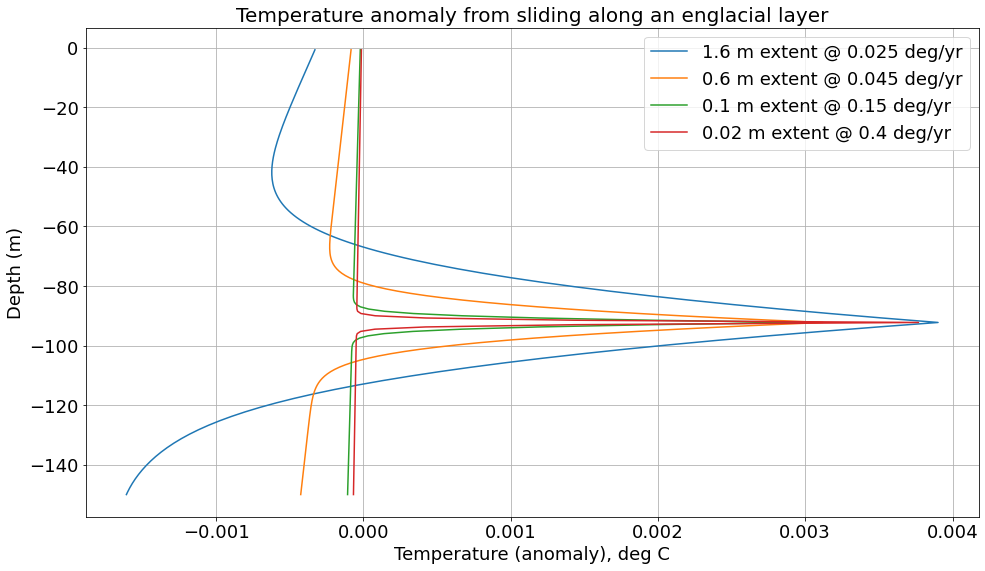

In [22]:
fig,ax=plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('w')
strength = [0.025,0.045,0.15,0.4]
for i,start_year in enumerate((2015,2020,2022.5,2022.9)):
    source = np.zeros((nz+1,nt+1))
    source[np.argmin(np.abs(z-92)),t>start_year] = strength[i]

    U,t,z = heat(t_surf,tmax=end_year,tmin=start_year,nt=nt,zmax=max_depth,
            S = source, nz=nz)

    sliding_distance = np.round((2023-start_year) * 0.2,2)
    ax.plot(detrend(U[:,-1],axis=0),-z,'-',
            label=f'{sliding_distance} m extent @ {strength[i]} deg/yr')
    ax.set_xlabel('Temperature (anomaly), deg C',fontsize=18)
    ax.set_ylabel('Depth (m)',fontsize=18)

plt.title('Temperature anomaly from sliding along an englacial layer',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.show()

In [18]:
# What do the strengths mean?

rhocp = 910 * 2.39 # J / m^3 / deg C
overburden = 9.8 * 92 * 910
sigma = overburden  # Pa = J / m^3
layer_thickness = 0.01 # m
velocity = 0.2 * 0.00005 # m/yr
strainrate = velocity / layer_thickness # 1/yr

strainrate * sigma / rhocp # deg C / yr

0.3772384937238494

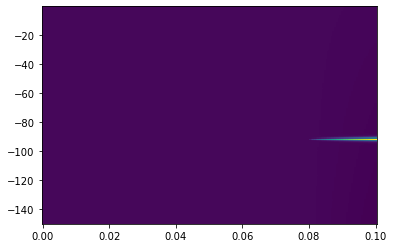

In [23]:
plt.pcolor(t-start_year,-z,detrend(U,axis=0))